In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [48]:
fake_job_postings = pd.read_csv('data/fake_job_postings.csv')

In [7]:
fake_job_postings.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


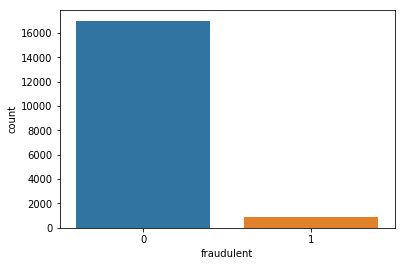

In [22]:
sns.countplot(x="fraudulent", data=fake_job_postings)
plt.show()

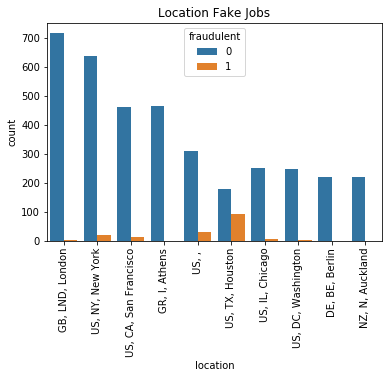

In [39]:
sns.countplot(x="location", data=fake_job_postings, hue="fraudulent",
              order=fake_job_postings.location.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Location Fake Jobs')
plt.show()

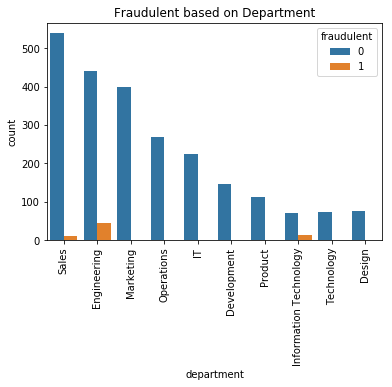

In [40]:
sns.countplot(x="department", data=fake_job_postings, hue="fraudulent",
              order=fake_job_postings.department.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Fraudulent based on Department')
plt.show()

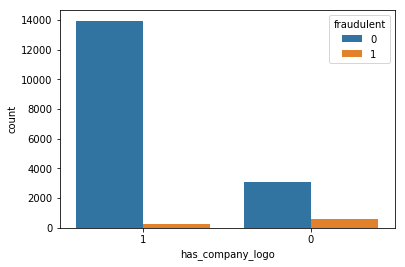

In [42]:
sns.countplot(x="has_company_logo", data=fake_job_postings, hue="fraudulent",
              order=fake_job_postings.has_company_logo.value_counts().iloc[:10].index)
plt.show()

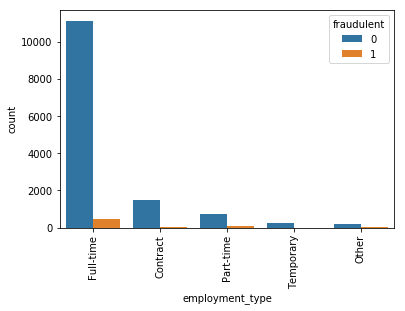

In [43]:
sns.countplot(x="employment_type", data=fake_job_postings, hue="fraudulent",
              order=fake_job_postings.employment_type.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

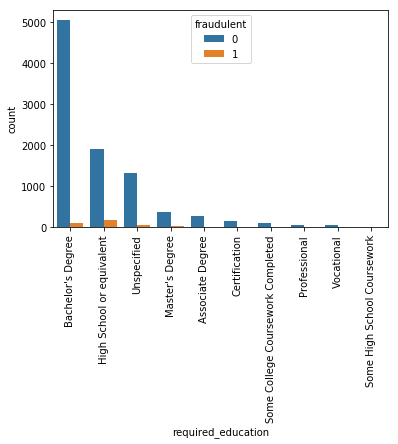

In [44]:
sns.countplot(x="required_education", data=fake_job_postings, hue="fraudulent", 
              order=fake_job_postings.required_education.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

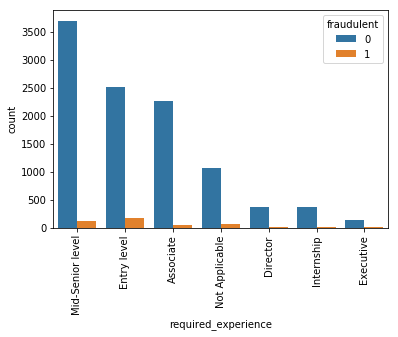

In [45]:
sns.countplot(x="required_experience", data=fake_job_postings, hue="fraudulent",
              order=fake_job_postings.required_experience.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

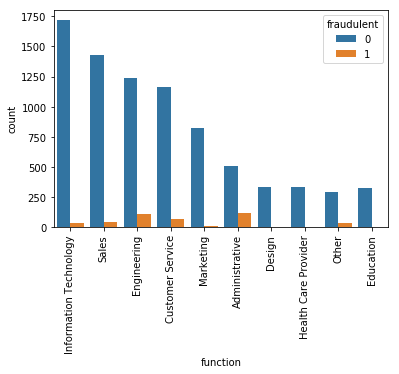

In [47]:
sns.countplot(x="function", data=fake_job_postings, hue="fraudulent",
              order=fake_job_postings.function.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

In [53]:
import json
from difflib import get_close_matches

dictionary_data = json.load(open('data/data.json'))

In [55]:
fake_job_postings.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [57]:
fake_job_postings.company_profile[0]

"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City."

In [297]:
import re
import nltk

review1 = fake_job_postings.company_profile[0]

review1 = review1.replace(".", "")
review1 = review1.replace("-", " ")
review1 = review1.replace(",", "")
review1 = review1.replace(";", "")
#review1 = review1.replace("'", "")
find_apostrophe = review1.find("'")
pattern = r'[0-9]'
review1 = re.sub(pattern, '', review1)
review1 = review1.lower()


In [298]:
review1

"we're food and we've created a groundbreaking and award winning cooking site we support connect and celebrate home cooks and give them everything they need in one placewe have a top editorial business and engineering team we're focused on using technology to find new and better ways to connect people around their specific food interests and to offer them superb highly curated information about food and cooking we attract the most talented home cooks and contributors in the country we also publish well known professionals like mario batali gwyneth paltrow and danny meyer and we have partnerships with whole foods market and random housefood has been named the best food website by the james beard foundation and iacp and has been featured in the new york times npr pando daily techcrunch and on the today showwe're located in chelsea in new york city"

In [288]:
find_apostrophe

2

In [276]:
tagged_sentence = nltk.tag.pos_tag(review1.split())
#tagged_sentence
#edited_sentence = [word for word,tag in tagged_sentence if tag != 'NN' and tag!= 'NNS' and tag!='JJ']
edited_sentence = [word for word,tag in tagged_sentence]

In [277]:
tagged_sentence

[('were', 'VBD'),
 ('food', 'NN'),
 ('and', 'CC'),
 ('weve', 'NN'),
 ('created', 'VBD'),
 ('a', 'DT'),
 ('groundbreaking', 'NN'),
 ('and', 'CC'),
 ('award', 'NN'),
 ('winning', 'VBG'),
 ('cooking', 'VBG'),
 ('site', 'NN'),
 ('we', 'PRP'),
 ('support', 'VBP'),
 ('connect', 'JJ'),
 ('and', 'CC'),
 ('celebrate', 'JJ'),
 ('home', 'NN'),
 ('cooks', 'NNS'),
 ('and', 'CC'),
 ('give', 'VB'),
 ('them', 'PRP'),
 ('everything', 'NN'),
 ('they', 'PRP'),
 ('need', 'VBP'),
 ('in', 'IN'),
 ('one', 'CD'),
 ('place', 'NN'),
 ('we', 'PRP'),
 ('have', 'VBP'),
 ('a', 'DT'),
 ('top', 'JJ'),
 ('editorial', 'NN'),
 ('business', 'NN'),
 ('and', 'CC'),
 ('engineering', 'NN'),
 ('team', 'NN'),
 ('were', 'VBD'),
 ('focused', 'VBN'),
 ('on', 'IN'),
 ('using', 'VBG'),
 ('technology', 'NN'),
 ('to', 'TO'),
 ('find', 'VB'),
 ('new', 'JJ'),
 ('and', 'CC'),
 ('better', 'JJR'),
 ('ways', 'NNS'),
 ('to', 'TO'),
 ('connect', 'VB'),
 ('people', 'NNS'),
 ('around', 'IN'),
 ('their', 'PRP$'),
 ('specific', 'JJ'),
 ('food', 

In [278]:
#edited_sentence

In [279]:
count = 0
for word in edited_sentence:
    if word not in dictionary_data:
        print(word)
        count+=1
        
print(count)

were
weve
created
groundbreaking
site
cooks
were
focused
using
ways
interests
superb
curated
most
cooks
contributors
professionals
mario
batali
gwyneth
paltrow
danny
meyer
partnerships
foods
been
named
website
james
iacp
been
featured
york
npr
pando
techcrunch
were
located
chelsea
york
40
